## Password Checker

In [2]:
_password = "floccinaucinihilipilification"

#_password = "Hippopotomonstrosesquippedaliophobia"

def naive_checker(attempt):
    n = len(_password)
    success = True
    if len(attempt) != n:
        success = False
    else:
        for idx in range(n):
            if attempt[idx] != _password[idx]:
                success = False
                break
    return success


print(naive_checker("super"))
print(naive_checker("floccinaucinihilipilification"))

%timeit -n 100 naive_checker("super")
%timeit -n 100 naive_checker("floccinaucinihilipilification")
%timeit -n 100 naive_checker("floccinaucinihiiiiiiiiiiiiiii")

False
True
122 ns ± 8.68 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.1 μs ± 612 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
880 ns ± 38.6 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
import timeit
import numpy as np
from statistics import median

#get average time
def validation_time(attempt, n = 1, f = naive_checker):
    times = []
    for _ in range(n):
        start_time = timeit.default_timer()
        f(attempt)
        end_time = timeit.default_timer()
        times.append(end_time - start_time)
    return median(times)
    #return sum(times)/n
print(validation_time("floccinaucinihilipilification", 100))
print(validation_time("floccinaucinihiiiiiiiiiiiiiii", 100))
print(validation_time("super", 100))
print(validation_time("PasswordPassword", 300))

1.6999983927235007e-06
1.1000010999850929e-06
1.9999970390927047e-07
1.9999970390927047e-07


In [ ]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import time

# Generate RSA Key Pair (for testing)
def generate_rsa_keys():
    key = RSA.generate(1024)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    return private_key, public_key

# Encrypt a message
def rsa_encrypt(public_key, message):
    rsa_key = RSA.import_key(public_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    encrypted_msg = cipher.encrypt(message.encode())
    return encrypted_msg

# Decrypt a message
def rsa_decrypt(private_key, encrypted_msg):
    rsa_key = RSA.import_key(private_key)
    cipher = PKCS1_OAEP.new(rsa_key)
    start_time = time.time()
    decrypted_msg = cipher.decrypt(encrypted_msg)
    end_time = time.time()
    return decrypted_msg.decode(), (end_time - start_time)


## Iterative Cracker

In [66]:
import random
import string

pass_length = len(_password)
valid_charset = string.ascii_lowercase
n_repeats = 61

initialpass = ''.join(" " for _ in range(pass_length))
print(initialpass)
time = validation_time(initialpass, n_repeats)

for i in range(pass_length):
    nextchar = ""
    for char in valid_charset:
        tester = initialpass[:i] + char + initialpass[i+1:]
        #print(tester)
        testtime = validation_time(tester, n_repeats)
        if testtime > time:
            time = testtime
            nextchar = char
    initialpass = initialpass[:i] + nextchar + initialpass[i+1:]
    print("best")
    print(initialpass)

                             
best
                            
best
                           
best
                          
best
                         
best
                        
best
                       
best
                      
best
                     
best
                    
best
                   
best
                  
best
                 
best
                
best
               
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              
best
              


## Genetic Algorithm

Representation of the solution
 - Assume attempts are correct length
 - Objective Value: Time taken to get back success result
 - Population: 1000 solutions

Selection Strategy
 - Use roulette wheel to choose best solutions as parents

Reproduction Strategy
 - Crossover: Breeding ideas:
  - Preserve first run of same characters
  - TPX (Two Point Crossover)

 - Mutation: 

Replacement Strategy
- replace lambda proportion of the population

In [13]:
import random
import string

#initial population
pass_length = len(_password)
valid_charset = string.ascii_lowercase
pop_size = 2000
random.seed(1)

init_population = [''.join(random.choice(valid_charset) for _ in range(pass_length)) for _ in range (pop_size)]

#init_population[0] = "floccinaucinihiiiiiiiiiiiiiii"
print(init_population)


['eszycidpyopumzgdpamntyyawoixz', 'hsdkaaauramvgnxaqhyoprhlhvhyo', 'janrudfuxjdxkxwqnqvgjjspqmsbp', 'hxzmnvflrwyvxlcovqdyfqmlpxapb', 'jwtssmuffqhaygrrhmqlsloivrtxa', 'mzxqzeqyrgnbplsrgqnplnlarrtzt', 'kotazhufrsfczrzibvccaoayyihid', 'ztfljcffiqfviuwjowkppdajmknzg', 'idixqgtnahamebxfowqvnrhuzwqoh', 'quamvszkvunbxjegbjccjjxfnsiea', 'rbsgsofywtqbmgldgsvnsgpdvmjqp', 'aktmjafgkzszekngivdmrlvrpyrhc', 'xbceffrgiyktqilkkdjhtywpesryd', 'kbncmzeekdtszmcsrhsciljsrdoid', 'zbjatvacndzbghzsnfdofvhfxdnmz', 'rjriwpkdgukbaazjxtkomkmccktod', 'igztyrwpvlifrgjghlcicyocusukh', 'mjbkfkzsjhkdrtsztchhazhmcircx', 'cauajyzlppedqyzkcqvffyeekjdwq', 'tjegerxbyktzvrxwgfjnrfbwvhiyc', 'voznriroroamkfipazunsabwlsese', 'eiimsmftchpafqkquovuxhhkpvphw', 'nkrtxuiuhbcyqulfqyzgjjwjrlfww', 'xotcdtqsmfeingsxyzbpvmwulmqfr', 'xbqcziudixceytvvwcohmznmfkoet', 'pgdntrndvjihmxragqosaauthigfj', 'ergijsyivozzfrlpndygsmgjzdzad', 'sxarjvyxuecqlszjnqvlyqkadowol', 'jrmkzxvspdummgraiutxxxqgotqnx', 'wjwfotvqglqavmsnmktsxwxcpxhuu', 'juanxueu

In [34]:
#generate timings for each attempt
def fitness(population, f = naive_checker):
    n_repeats = 1
    timings = []
    for individual in population:
        ind_time = validation_time(individual, n_repeats, f)
        timings.append(ind_time)
    return timings

print(fitness(init_population))

[2.200249582529068e-06, 5.00120222568512e-07, 4.00003045797348e-07, 4.00003045797348e-07, 3.003515303134918e-07, 4.00003045797348e-07, 3.003515303134918e-07, 6.002373993396759e-07, 2.998858690261841e-07, 6.002373993396759e-07, 4.00003045797348e-07, 2.998858690261841e-07, 2.998858690261841e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.998858690261841e-07, 2.998858690261841e-07, 2.998858690261841e-07, 1.9976869225502014e-07, 2.998858690261841e-07, 2.998858690261841e-07, 2.998858690261841e-07, 2.0023435354232788e-07, 3.003515303134918e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.0023435354232788e-07, 2.998858690261841e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.998858690261841e-07, 2.998858690261841e-07, 4.00003045797348e-07, 2.998858690261841e-07, 3.003515303134918e-07, 2.998858690261841e-07, 3.003515303134918e-07, 1.9976869225502014e-07, 2.0023435354232788e-07, 1.997686922

In [28]:
#Defining Crossover and Mutation
mutation_rate = 0.005

def crossover(parent1, parent2):
    child = []
    run_same = True

    for i in range(pass_length):
        if run_same and parent1[i] == parent2[i]:
            child.append(parent1[i])
        else:
            run_same = False
            child.append(random.choice([parent1[i], parent2[i]]))
    
    return "".join(child)

def mutate(individual):
    individual = list(individual)
    
    for i in range(len(individual)):
        if random.random() < mutation_rate:  
            new_char = random.choice(valid_charset)
            # Ensure mutation produces a different character
            while new_char == individual[i]:  
                new_char = random.choice(valid_charset)
            individual[i] = new_char
    
    return ''.join(individual)

In [31]:
lambda_proportion = 0.8

def roulette_wheel_selection(population, fitness):
  
    max_fitness = max(fitness)

    '''Better to not normalise?'''
    #normalized_fitness = [max_fitness - f for f in fitness]
    
    # Calculate cumulative probabilities
    total_fitness = sum(fitness)
    probabilities = [f / total_fitness for f in fitness]
    cumulative_probs = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
    
    # Select lambda proportion of the population
    selected_count = int(len(population) * lambda_proportion)
    selected = []
    
    for _ in range(selected_count):
        r = random.random()
        for i, cum_prob in enumerate(cumulative_probs):
            if r <= cum_prob:
                selected.append(population[i])
                break
    
    return selected

def top_prop_selection(population, fitness):
    sorted_timings = sorted(enumerate(fitness), key= lambda x: x[1], reverse=True)
    sorted_population = [population[fitness_pair[0]] for fitness_pair in sorted_timings]
    #print(sorted_timings)
    #rint(sorted_population)
    # Select lambda proportion of the population
    selected_count = int(len(population) * lambda_proportion)
    selected = []

    for i in range(selected_count):
        selected.append(sorted_population[i])
    
    return selected


print(top_prop_selection(
    ["one", "two", "three", "four", "five", "six", "seven"],
    [3, 2, 1, 5, 7, 6, 4]
))

def next_generation(selected):
    next_generation = []
    
    while len(next_generation) < pop_size:

        parent1, parent2 = random.sample(selected, 2)

        child = crossover(parent1, parent2)
        child = mutate(child)
        
        next_generation.append(child)
    
    return next_generation

def next_generation_duplicate(selected):
    next_generation = []
    idx = 0
    overflow = len(selected)

    while len(next_generation) < pop_size:
        child = mutate(selected[idx%overflow])
        next_generation.append(child)

    return next_generation




['five', 'six', 'four', 'seven', 'one']


In [38]:
#tracking Storage
best_fitness_storage = []
avg_fitness_storage = []

def genetic_algorithm(initial_population, generations):
    population = initial_population
    fitness_scores = fitness(population)
    print(population)
    print(fitness_scores)



    for gen in range(generations):
        print(f"Generation {gen + 1}")
        
        # Roulette wheel selection
        #selected = roulette_wheel_selection(population, fitness_scores)
        selected = top_prop_selection(population, fitness_scores)
        #print(selected)
        
        # Generate next generation
        population = next_generation(selected)
        #population = next_generation_duplicate(selected)

        # Recalculate fitness for the new generation
        fitness_scores = fitness(population)
        
        # # Print best solution so far
        # best_fitness = max(fitness_scores)
        # best_individual = population[fitness_scores.index(best_fitness)]
        # print(f"Best Individual: {best_individual}, Fitness: {best_fitness}")
        # Calculate metrics
        best_fitness = max(fitness_scores)
        best_individual = population[fitness_scores.index(best_fitness)]
        avg_fitness = sum(fitness_scores) / len(fitness_scores)
        
        # Print metrics
        print(f"Best Fitness: {best_fitness}")
        print(f"Average Fitness: {avg_fitness}")
        print(f"Best Individual: {best_individual}")
        
        # Store metrics for plotting
        best_fitness_storage.append(best_fitness)
        avg_fitness_storage.append(avg_fitness)
 
    
    return population, fitness_scores

In [39]:
generations = 10000

final_population, final_fitness = genetic_algorithm(init_population, generations)

['eszycidpyopumzgdpamntyyawoixz', 'hsdkaaauramvgnxaqhyoprhlhvhyo', 'janrudfuxjdxkxwqnqvgjjspqmsbp', 'hxzmnvflrwyvxlcovqdyfqmlpxapb', 'jwtssmuffqhaygrrhmqlsloivrtxa', 'mzxqzeqyrgnbplsrgqnplnlarrtzt', 'kotazhufrsfczrzibvccaoayyihid', 'ztfljcffiqfviuwjowkppdajmknzg', 'idixqgtnahamebxfowqvnrhuzwqoh', 'quamvszkvunbxjegbjccjjxfnsiea', 'rbsgsofywtqbmgldgsvnsgpdvmjqp', 'aktmjafgkzszekngivdmrlvrpyrhc', 'xbceffrgiyktqilkkdjhtywpesryd', 'kbncmzeekdtszmcsrhsciljsrdoid', 'zbjatvacndzbghzsnfdofvhfxdnmz', 'rjriwpkdgukbaazjxtkomkmccktod', 'igztyrwpvlifrgjghlcicyocusukh', 'mjbkfkzsjhkdrtsztchhazhmcircx', 'cauajyzlppedqyzkcqvffyeekjdwq', 'tjegerxbyktzvrxwgfjnrfbwvhiyc', 'voznriroroamkfipazunsabwlsese', 'eiimsmftchpafqkquovuxhhkpvphw', 'nkrtxuiuhbcyqulfqyzgjjwjrlfww', 'xotcdtqsmfeingsxyzbpvmwulmqfr', 'xbqcziudixceytvvwcohmznmfkoet', 'pgdntrndvjihmxragqosaauthigfj', 'ergijsyivozzfrlpndygsmgjzdzad', 'sxarjvyxuecqlszjnqvlyqkadowol', 'jrmkzxvspdummgraiutxxxqgotqnx', 'wjwfotvqglqavmsnmktsxwxcpxhuu', 'juanxueu

KeyboardInterrupt: 

['floccinaucinihwnkrznsmjppqkbs', 'floccinaucinihewkcmsfmhsjqkbc', 'floccqnaucinihfhxrqsazjlfncda', 'floccinaucinihvorwmyyzvlprkmv', 'floccinaucinihbomrhgezvmbzctp', 'floccinaucinihivcwsvmbvdhjldt', 'floccinaucinihgerpxgdurfrnidc', 'floccinaucinihiebbhvmzbminibq', 'floccinaucinihemnghjdzaounfbx', 'floccinaucinihisgagjuvbzjiida', 'floccinaucinihdhhmnzrzmmurcop', 'floccinaucinihcjqtgoqmjacqwgc', 'floccinaucinihifcahgmmjlzgcdr', 'floccinaucinihiingrvsvuubjmyr', 'floccinaucinihedwargyfvmonmog', 'floccinaucinivivlrhvrgzycjckm', 'floccinaucinihgqubhvofvludmtp', 'floccinaucicihrobzyzvurmxomog', 'floccinaucinihggxthjgmrpzrsfa', 'floccinaucinihiwaazngfjehrima', 'floccinaucinihdoagmvfmzpodkzq', 'floccinaucinihidkvhznfromrcop', 'floccinaucinihiwrrhdrvamgvitc', 'floccinaucinihbdtctihfjnpncav', 'floccinauciniubodzizrwbpmowvg', 'floccinaucinihmyjvzgrcylzvwdq', 'floccinaucinihysgtxgqvnlurptq', 'floccinaucinihkeugzguvemzqmtq', 'floccinaucinizkyrrtgffvuztfod', 'floccinaucinihrwftzvmvhluocew', 'floccina

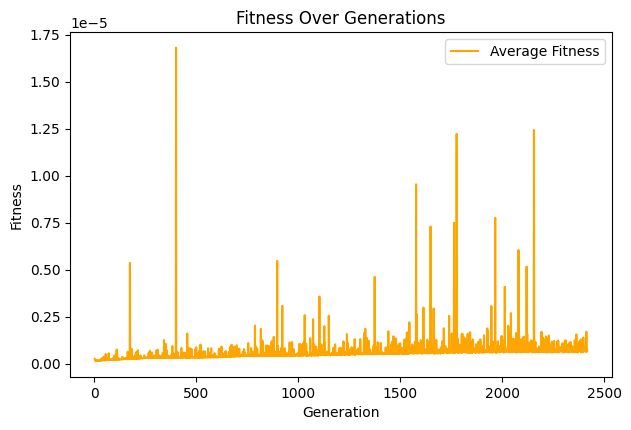

In [40]:
import matplotlib.pyplot as plt

print(final_population)
def plot_metrics(best_fitness, avg_fitness):
    generations = range(1, len(best_fitness) + 1)
    
    plt.figure(figsize=(12, 8))
    
    # Best Fitness and Average Fitness
    plt.subplot(2, 2, 1)
    #plt.plot(generations, best_fitness, label="Best Fitness", color="blue")
    plt.plot(generations, avg_fitness, label="Average Fitness", color="orange")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Over Generations")
    plt.legend()

    
    plt.tight_layout()
    plt.show()

plot_metrics(best_fitness_storage, avg_fitness_storage)

# BFS first n letters

In [10]:
def fitness_function(attempt):
    n_repeats = 3
    
    ind_time = validation_time(attempt, n_repeats)
    return ind_time

In [11]:
import itertools

def brute_force_best_next_letters(current_solution, password, fitness_function):
    """
    Brute force all permutations of the next 3 letters and return the best solution.
    """
    remaining_length = len(password) - len(current_solution)
    segment_length = min(3, remaining_length)  # Restrict to the next 3 letters or fewer
    
    # Generate all possible combinations for the next `segment_length` letters
    all_combinations = itertools.product(string.ascii_lowercase, repeat=segment_length)
    
    best_solution = current_solution
    best_fitness = float('-inf')  # Start with the worst possible fitness
    
    for combo in all_combinations:
        # Extend the current solution with this combination
        candidate_solution = current_solution + ''.join(combo)
        
        # Fill the rest with random guesses to match the password length
        candidate_solution += ''.join(random.choices(string.ascii_lowercase, k=(len(password) - len(candidate_solution))))
        
        # Evaluate fitness of the candidate solution
        candidate_fitness = fitness_function(candidate_solution)
        
        # Update the best solution if the candidate is better
        if candidate_fitness > best_fitness:
            best_solution = candidate_solution
            best_fitness = candidate_fitness
    
    return best_solution, best_fitness

In [12]:
def genetic_algorithm_with_brute_force(initial_population, generations, brute_force_interval):
    population = initial_population
    fitness_scores = fitness(population)
    
    for gen in range(generations):
        print(f"\n=== Generation {gen + 1} ===")
        
        # Print the population's best individual and its fitness
        best_fitness = max(fitness_scores)
        best_individual = population[fitness_scores.index(best_fitness)]
        print(f"Current Best Individual: {best_individual}, Fitness: {best_fitness}")
        
        # Roulette wheel selection
        selected = roulette_wheel_selection(population, fitness_scores)
        
        # Generate next generation
        population = next_generation(selected)
        
        # Recalculate fitness for the new generation
        fitness_scores = fitness(population)
        
        # Brute force step every `brute_force_interval` generations
        if (gen + 1) % brute_force_interval == 0:
            print("\nRunning Brute Force Step...")
            
            # Select the top 10 individuals based on fitness
            top_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)[:5]
            top_solutions = [population[i] for i in top_indices]
            
            # Run brute force for the next 3 letters for each top solution
            new_population = []
            for solution in top_solutions:
                brute_forced_solution, brute_force_fitness = brute_force_best_next_letters(solution, _password, fitness_function)
                print(f"Top Solution: {solution} -> Brute Forced: {brute_forced_solution}, Fitness: {brute_force_fitness}")
                new_population.append((brute_forced_solution, brute_force_fitness))
            
            # Sort by fitness and keep the top 50 solutions
            new_population = sorted(new_population, key=lambda x: x[1], reverse=True)[:20]
            population = [ind for ind, fit in new_population]
            fitness_scores = [fit for ind, fit in new_population]
            
            print(f"Brute Force Population Updated. Best Solution: {population[0]}, Fitness: {fitness_scores[0]}")
    
    return population, fitness_scores


In [ ]:
brute_force_interval = 1000
generations = 10

# Run the genetic algorithm with brute force
final_population, final_fitness = genetic_algorithm_with_brute_force(
    init_population, 
    generations, 
    brute_force_interval
)

# Final best solution
best_individual = final_population[final_fitness.index(max(final_fitness))]
print(f"\nFinal Best Individual: {best_individual}, Fitness: {max(final_fitness)}")